![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

## In this project, you will use regression models to predict the number of days a customer rents DVDs for.



### 1. Read in the csv file rental_info.csv using pandas.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df= pd.read_csv('rental_info.csv')
df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


### 2.Create a column named "rental_length_days" using the columns "return_date" and "rental_date", and add it to the pandas DataFrame. This column should contain information on how many days a DVD has been rented by a customer.

In [2]:
df.dtypes
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])

df.loc[:, 'rental_length_days'] = (df['return_date'] - df['rental_date']).dt.days
df.loc[:, 'rental_length_days']

0        3
1        2
2        7
3        2
4        4
        ..
15856    6
15857    4
15858    9
15859    8
15860    6
Name: rental_length_days, Length: 15861, dtype: int64

### 3. Create two columns of dummy variables from "special_features", which takes the value of 1 when:
### The value is "Deleted Scenes", storing as a column called "deleted_scenes".
### The value is "Behind the Scenes", storing as a column called "behind_the_scenes".

In [3]:
df.head(3)

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7


In [4]:
df['deleted_scenes'] = df['special_features'].apply(lambda x : 1 if 'Deleted Scenes' in x else 0)
df['behind_the_scenes'] = df['special_features'].apply(lambda x : 1 if 'Behind the Scenes' in x else 0)

### Make a pandas DataFrame called X containing all the appropriate features you can use to run the regression models, avoiding columns that leak data about the target.

### Choose the "rental_length_days" as the target column and save it as a pandas Series called y.

In [5]:
X = df.select_dtypes(include='number').drop(['amount_2', 'length_2', 'rental_rate_2', 'rental_length_days'], axis=1)
y = df['rental_length_days']

In [6]:
X.shape

(15861, 11)

preprocessing

### Split the data into X_train, y_train, X_test, and y_test train and test sets, avoiding any features that leak data about the target variable, and include 20% of the total data in the test set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=9)

### Recommend a model yielding a mean squared error (MSE) less than 3 on the test set

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mean_squared_error(y_test, lr_pred)

3.0145119700303256

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso(0.5)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mean_squared_error(y_test, lasso_pred)

3.4319784025883235

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge(0.5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mean_squared_error(y_test, ridge_pred)

3.014508773415322

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
mean_squared_error(y_test, dt_pred)

2.1549407772313884

## another better approach

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_6052\3471802720.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results.values(), labels=cv_results.keys())


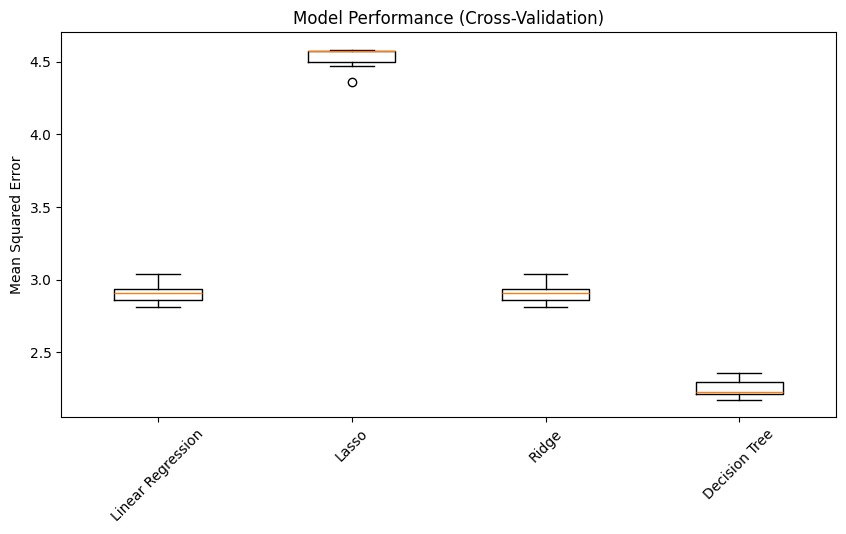

                        MSE      RMSE       MAE        R2
Decision Tree      2.179174  1.476203  1.111074  0.693055
Ridge              3.014506  1.736233  1.442975  0.575396
Linear Regression  3.014512  1.736235  1.442982  0.575395
Lasso              4.605503  2.146044  1.808947  0.351298


In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.5),
    "Ridge": Ridge(alpha=0.5),
    "Decision Tree": DecisionTreeRegressor()
}

# Cross-validation
kf = KFold(n_splits=6, random_state=42, shuffle=True)
cv_results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_results[name] = np.abs(cv_score)

# Boxplot of cross-validation results
plt.figure(figsize=(10, 5))
plt.boxplot(cv_results.values(), labels=cv_results.keys())
plt.title("Model Performance (Cross-Validation)")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.show()

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='MSE'))
